In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dd.dd import Analysis_DD
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison
from tqdm import tqdm
from ctd.comparison.metrics import compute_jacobians, compute_lyaps


dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:
HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/tt_3bff/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT, use_train_dm=True)

pathDT = pathTT + "20250130_NBFF_LFADS_Viz/prefix=tt_3bff_max_epochs=500_seed=0/"
an_DT = Analysis_DD.create(run_name = "DT", filepath = pathDT, model_type = "LFADS")

/home/csverst/Github/CtDBenchmark/


In [3]:
# Compute Jacobians
inputs = an_TT.get_inputs(phase='val')
lats = an_TT.get_latents(phase='val')
lats_inf = an_DT.get_latents(phase='val')


In [10]:

Jz, Ju, trial_inds = compute_jacobians(lats, inputs, an_TT.model.cell, num_trials=200)
Jz_DT, Ju_DT, trial_inds_DT = compute_jacobians(lats_inf, inputs, an_DT.model.decoder.rnn.cell.gen_cell, num_trials=200)


/home/csverst/miniconda3/envs/ctdCuda12/lib/python3.10/site-packages/torch/_functorch/deprecated.py:83: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.jacrev is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.func.jacrev instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('jacrev')
/home/csverst/miniconda3/envs/ctdCuda12/lib/python3.10/site-packages/torch/_functorch/deprecated.py:61: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.vmap is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.vmap instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecat

In [11]:
# reload the compute lyaps function, overwriting the previous load into this # namespace
from ctd.comparison.metrics import compute_lyaps


lyaps = compute_lyaps(Jz).detach().numpy()
lyaps_DT = compute_lyaps(Jz_DT).detach().numpy()
# lyaps_DT = compute_lyaps(Jz_DT)

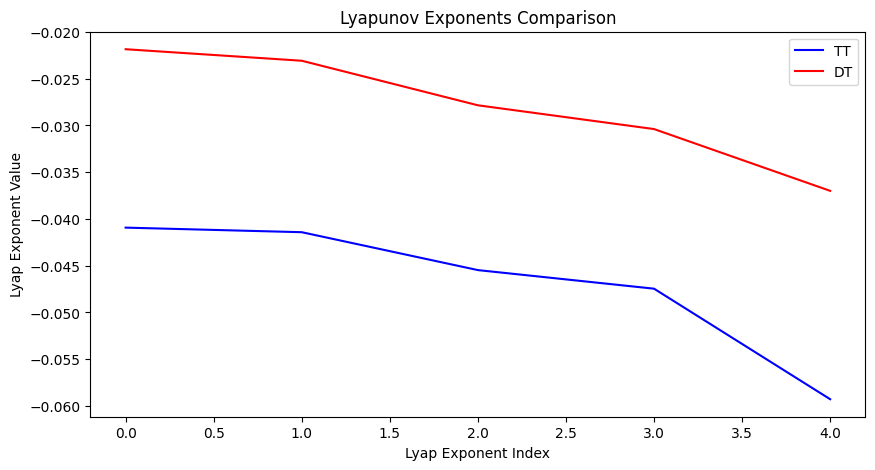

In [14]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(lyaps[0,:5], label='TT', color='blue')
ax.plot(lyaps_DT[0,:5], label='DT', color='red')
# ax.set_xlim(0,10)

ax.set_xlabel('Lyap Exponent Index')
ax.set_ylabel('Lyap Exponent Value')
ax.set_title('Lyapunov Exponents Comparison')
ax.legend()


Iteration 500/10000
q = 1.17E-02 +/- 5.26E-02
dq = 4.99E-05 +/- 2.04E-04

Iteration 1000/10000
q = 2.49E-03 +/- 1.18E-02
dq = 5.67E-06 +/- 2.81E-05

Iteration 1500/10000
q = 1.00E-03 +/- 4.71E-03
dq = 1.47E-06 +/- 7.27E-06

Iteration 2000/10000
q = 5.37E-04 +/- 2.49E-03
dq = 5.80E-07 +/- 2.92E-06

Iteration 2500/10000
q = 3.31E-04 +/- 1.48E-03
dq = 2.91E-07 +/- 1.51E-06

Iteration 3000/10000
q = 2.20E-04 +/- 9.24E-04
dq = 1.68E-07 +/- 8.29E-07

Iteration 3500/10000
q = 1.53E-04 +/- 6.13E-04
dq = 1.06E-07 +/- 4.91E-07

Iteration 4000/10000
q = 1.09E-04 +/- 4.20E-04
dq = 7.07E-08 +/- 3.15E-07

Iteration 4500/10000
q = 8.00E-05 +/- 2.94E-04
dq = 4.87E-08 +/- 2.13E-07

Iteration 5000/10000
q = 5.95E-05 +/- 2.07E-04
dq = 3.45E-08 +/- 1.47E-07

Iteration 5500/10000
q = 4.48E-05 +/- 1.48E-04
dq = 2.49E-08 +/- 1.00E-07

Iteration 6000/10000
q = 3.41E-05 +/- 1.08E-04
dq = 1.83E-08 +/- 6.97E-08

Iteration 6500/10000
q = 2.62E-05 +/- 7.97E-05
dq = 1.36E-08 +/- 4.81E-08

Iteration 7000/10000
q = 

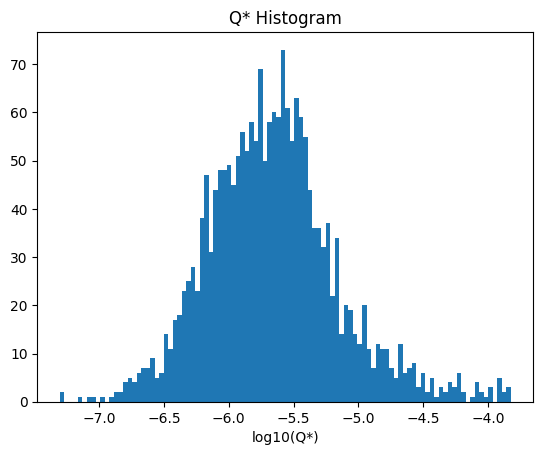

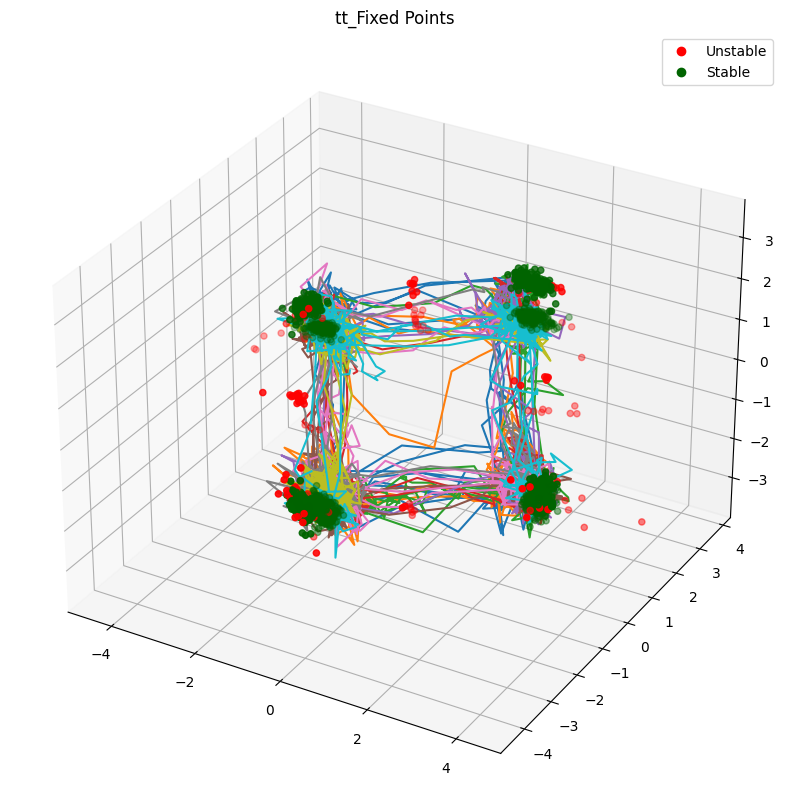

In [15]:
tt_fps = an_TT.plot_fps(
    inputs = torch.zeros(3),
    learning_rate=1e-3,
    noise_scale=0.0,
    n_inits = 2000,
    max_iters=10000,
    device = "cpu",
)

[[-0.05452541  0.23628633  0.10147484 ... -0.16909125  0.13782604
   0.02184124]
 [-0.73109996  0.11845981 -0.46094096 ... -0.24483873 -0.729944
   0.5177518 ]
 [-0.1186483  -0.03632009  0.10179348 ...  0.7960481   0.17422245
  -0.534663  ]
 ...
 [-0.7636714  -0.4053879  -0.0400633  ...  0.832028   -0.7811355
   0.34484395]
 [-0.7013774   0.22953892  0.46806544 ... -0.6391705  -0.13282019
  -0.12978406]
 [-0.10834874 -0.23755516 -0.3628585  ...  0.81217223 -0.02097503
   0.30613825]]


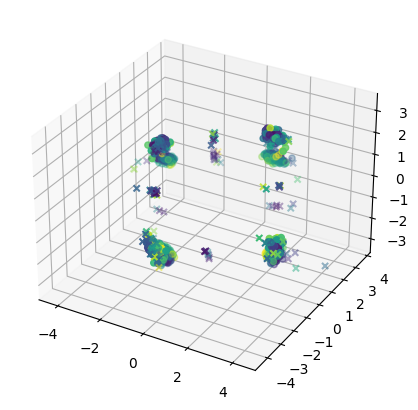

In [16]:
from sklearn.decomposition import PCA

q_thresh = 8e-6
q_flag = tt_fps.qstar < q_thresh

stable= tt_fps.is_stable
stable = stable[q_flag]

isStable = stable == 1
unStable = stable == 0

qstar = tt_fps.qstar
qstar = qstar[q_flag]
x_star = tt_fps.xstar
print(x_star)
x_star = x_star[q_flag, :]
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_star)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[isStable, 0], x_pca[isStable, 1], x_pca[isStable, 2], c=qstar[isStable], cmap='viridis', marker='o', label='Stable')
ax.scatter(x_pca[unStable, 0], x_pca[unStable, 1], x_pca[unStable, 2], c=qstar[unStable], cmap='viridis', marker='x', label='Unstable')


In [ ]:
dt_fps = an_DT.plot_fps(
    inputs = torch.zeros(3),
    learning_rate=1e-3,
    noise_scale=0.0,
    n_inits = 2000,
    max_iters=1000,
    device = "cpu",
)

In [ ]:
print(dt_fps)

In [ ]:
q_thresh = 8e-7
q_flag = dt_fps.qstar < q_thresh

stable= dt_fps.is_stable
stable = stable[q_flag]

isStable = stable == 1
unStable = stable == 0

qstar = dt_fps.qstar
qstar = qstar[q_flag]
x_star = dt_fps.xstar
print(x_star)
x_star = x_star[q_flag, :]
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_star)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[isStable, 0], x_pca[isStable, 1], x_pca[isStable, 2], c=qstar[isStable], cmap='viridis', marker='o', label='Stable')
ax.scatter(x_pca[unStable, 0], x_pca[unStable, 1], x_pca[unStable, 2], c=qstar[unStable], cmap='viridis', marker='x', label='Unstable')
